# Assignment 1


Working with World Development Indicators Dataset

Data Source: https://www.kaggle.com/worldbank/world-development-indicators

(Folder: 'world-development-indicators')

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns



In [ ]:
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans

del X, y, X_transformed

# Load a sample multivariate time series dataset
dataset = CachedDatasets().load_dataset("Trace")

# Extract the X and y from the dataset tuple
X, y = dataset[0], dataset[1]

# # Display original X (first 5 samples)
# print("Original X (First 5 samples):")
# for i, sample in enumerate(X[:5]):
#     print(f"Sample {i + 1}: {sample}")

# X_transformed = TimeSeriesScalerMeanVariance().fit_transform(X)
# # Display transformed X (first 5 samples)
# print("\nTransformed X (First 5 samples):")
# for i, sample in enumerate(X_transformed[:5]):
#     print(f"Sample {i + 1}: {sample}")
    
    
# Overlaying the first 3 time series before and after transformation
# Preprocess the data (scaling)
X_transformed = TimeSeriesScalerMeanVariance().fit_transform(X)
plt.figure(figsize=(10, 6))
plt.suptitle('Overlay of Original and Transformed Time Series Data (First 3 Samples)', fontsize=14)

for i in range(3):
    plt.subplot(3, 1, i +
                1)
    plt.plot(X[i], label='Original (X)')
    plt.plot(X_transformed[i], label='Transformed (X_transformed)')
    plt.title(f"Sample {i + 1}")
    plt.legend()

plt.tight_layout()
plt.show()

# Preprocess the data (scaling)
# X = TimeSeriesScalerMeanVariance().fit_transform(X)


# Perform Time Series K-Means clustering with DTW metric
n_clusters = 3
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True)
y_pred = model.fit_predict(X)


In [ ]:
# Display cluster assignments
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    cluster_samples = np.where(y_pred == cluster)[0]
    for i in cluster_samples:
        print(f"Sample {i}: Class {y[i]}")

In [ ]:
import matplotlib.pyplot as plt

# Plot a few time series samples
num_samples_to_plot = 5
for i in range(num_samples_to_plot):
    plt.plot(X[i].ravel(), label=f"Class {y[i]}")

plt.title("Sample Time Series Data")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot time series data points and color them by cluster
for cluster in range(n_clusters):
    cluster_samples = np.where(y_pred == cluster)[0]
    for i in cluster_samples:
        # X[i].ravel() - converts X matrix into a flat vector
        # print(X.shape)
        # z = X.ravel()
        # print(z.shape)
        plt.plot(X[i].ravel(), label=f"Cluster {cluster}")

plt.title("Time Series K-Means Clustering")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()


In [ ]:
y_pred
# y_pred.shape

In [ ]:
plt.hist(y, bins=max(y), edgecolor='black')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


import plotly.graph_objs as go

# Plot time series data using plotly
fig = go.Figure()

for i, ts in enumerate(X):
    fig.add_trace(go.Scatter(y=ts.ravel(), mode='lines', name=f"Class {y[i]}"))

fig.update_layout(title="Time Series Data Visualization", xaxis_title='Time Steps', yaxis_title='Value')
fig.show()


In [2]:
# Loading the data:
data = pd.read_csv('/Users/mariana/Documents/Classes/PythonForDataScience/Week-5/Week5-Visualization/world-development-indicators/Indicators.csv')

data.shape

(5656458, 6)

In [3]:
# Loading the data:
data = pd.read_csv('/Users/mariana/Documents/Classes/PythonForDataScience/Week-5/Week5-Visualization/world-development-indicators/Indicators.csv')

print(data.shape)

# Need to select data from countries only, exclude regions:
countries = pd.read_csv('/Users/mariana/Documents/Classes/PythonForDataScience/Week-5/Week5-Visualization/world-development-indicators/Country.csv')

print(countries.shape)


(5656458, 6)
(247, 31)


In [4]:
# Clean the indicators data frame, based on the country names/codes.
# We want to look only at countries and not regions.
# Country codes (Alpha2Code) with numbers correspond to regions - remove.

# Filter the country codes to exclude things with numbers &
# Remove also countries with no region.
# The regular expression \d matches any digit (0-9)
countries_filtered = countries[(~countries['Alpha2Code'].str.contains(r'\d', na=False)) &\
                              (countries['Region'].notna())]

countries_filtered
countriesToKeep = countries_filtered['CountryCode'].unique().tolist()
data_clean1 = data[data['CountryCode'].isin(countriesToKeep)]

data_clean1

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3492,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.453210e+02
3493,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.171773e+01
3494,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.086254e+00
3495,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,7.663147e+01
3496,Afghanistan,AFG,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,4.000000e+07
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


In [ ]:
# Explore the relationship between:
# GDP: 'GDP per capita (current LCU)'
# Rural pop: 'Rural population (% of total population)'
# Fertility rate: 'Fertility rate, total (births per woman)'
# Electriticy: 'Electric power consumption (kWh per capita)'
# Energy use: 'Energy use (kg of oil equivalent per capita)'
# Climate: 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)''

# Step 1: clean the data (confirm the same numbers of entries for all datasets)
# Step 2: correlations
# Step 3: multivariate regression
# --- This is what I did for project 1
# --- Now adding a few more analysis
# Step 4: add a few more indicators
# Step 5: use Dynamic time warping to find the best match between time evolution of fertility rates in different countries.
# Step 6: do some clustering of different countries
# Step 7: plot the clusters on a map to try illustrate what might be happening (culture, policy)




In [5]:
# Step 1.A - select indicators and find the current years and countries

fertility = r'Fertility rate, total \(births per woman\)'

gdp = r'GDP per capita \(current US\$\)'
rural = 'Rural population \(% of total population\)'
electricity = r'Electric power consumption \(kWh per capita\)'
energy = r'Energy use \(kg of oil equivalent per capita\)'
climate = r'Droughts, floods, extreme temperatures \(% of population, average 1990-2009\)'
literacy = r'Adult literacy rate, population 15\+ years, both sexes \(%\)'

fertility_data = data_clean1[data_clean1['IndicatorName'].str.contains(fertility, case=False, regex=True)]

gdp_data = data_clean1[data_clean1['IndicatorName'].str.contains(gdp, case=False, regex=True)]
rural_data = data_clean1[data_clean1['IndicatorName'].str.contains(rural, case=False, regex=True)]
electricity_data = data_clean1[data_clean1['IndicatorName'].str.contains(electricity, case=False, regex=True)]
energy_data = data_clean1[data_clean1['IndicatorName'].str.contains(energy, case=False, regex=True)]
climate_data = data_clean1[data_clean1['IndicatorName'].str.contains(climate, case=False, regex=True)]
literacy_data = data_clean1[data_clean1['IndicatorName'].str.contains(literacy, case=False, regex=True)]


In [ ]:
# Confirm size/shape
print('fertility')
print(fertility_data.shape)
# print(fertility_data.value_counts())
print()
print('GDP')
print(gdp_data.shape)
# print(gdp_data.value_counts())
print()
print('rural')
print(rural_data.shape)
# print(rural_data.value_counts())
print()
print('electricity')
print(electricity_data.shape)
# print(electricity_data.value_counts())
print()
print('energy')
print(energy_data.shape)
# print(energy_data.value_counts())
print()
print('climate')
print(climate_data.shape)
# print(climate_data.value_counts())
print()
print('literacy')
print(literacy_data.shape)



In [6]:
# Step 1. B - Merge the data into a single dataframe

columns_keep = ['CountryCode', 'IndicatorCode', 'Year', 'Value']

merged_df_1 = pd.merge(fertility_data[columns_keep], gdp_data[columns_keep],\
                       on=['CountryCode', 'Year'], suffixes=('_fertility', '_gdp'))

merged_df_2 = pd.merge(merged_df_1, rural_data[columns_keep],\
                       on=['CountryCode', 'Year'])

dataIn = pd.merge(merged_df_2, energy_data[columns_keep],\
                       on=['CountryCode', 'Year'], suffixes=('_rural', '_energy'))

dataIn.head(5)

,CountryCode,IndicatorCode_fertility,Year,Value_fertility,IndicatorCode_gdp,Value_gdp,IndicatorCode_rural,Value_rural,IndicatorCode_energy,Value_energy
0,AUS,SP.DYN.TFRT.IN,1960,3.453,NY.GDP.PCAP.CD,1806.804876,SP.RUR.TOTL.ZS,18.471,EG.USE.PCAP.KG.OE,3063.554271
1,AUT,SP.DYN.TFRT.IN,1960,2.690,NY.GDP.PCAP.CD,935.460427,SP.RUR.TOTL.ZS,35.280,EG.USE.PCAP.KG.OE,1546.261468
2,BEL,SP.DYN.TFRT.IN,1960,2.540,NY.GDP.PCAP.CD,1273.691659,SP.RUR.TOTL.ZS,7.540,EG.USE.PCAP.KG.OE,2519.497320
3,CAN,SP.DYN.TFRT.IN,1960,3.811,NY.GDP.PCAP.CD,2294.568814,SP.RUR.TOTL.ZS,30.939,EG.USE.PCAP.KG.OE,4251.435911
4,DNK,SP.DYN.TFRT.IN,1960,2.570,NY.GDP.PCAP.CD,1364.517160,SP.RUR.TOTL.ZS,26.313,EG.USE.PCAP.KG.OE,1922.973673


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Select data from a single country:
# PRT - Portugal
dataSingleCountry = dataIn.loc[dataIn['CountryCode'] == 'PRT']


# Create a time series using 'Year' as the index
dataSingleCountry['Year'] = pd.to_datetime(dataSingleCountry['Year'], format='%Y')
dataSingleCountry.set_index('Year', inplace=True)

# Run seasonal decomposition on the 'Value_fertility' column
result = seasonal_decompose(dataSingleCountry['Value_fertility'], model='additive', period=1)

# Plot the decomposed time series
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
result.observed.plot(ax=axes[0,0], title='Observed')
result.trend.plot(ax=axes[1,0], title='Trend')
result.seasonal.plot(ax=axes[0,1], title='Seasonal')
result.resid.plot(ax=axes[1,1], title='Residual')

plt.tight_layout()
plt.show()




# # Assuming your time series data is in a pandas DataFrame called 'data' with a datetime index

# result = seasonal_decompose(dataSingleCountry['Value_fertility'], model='additive', period = dataSingleCountry['Year'])
# result.plot()



In [ ]:
result.seasonal
# dataSingleCountry

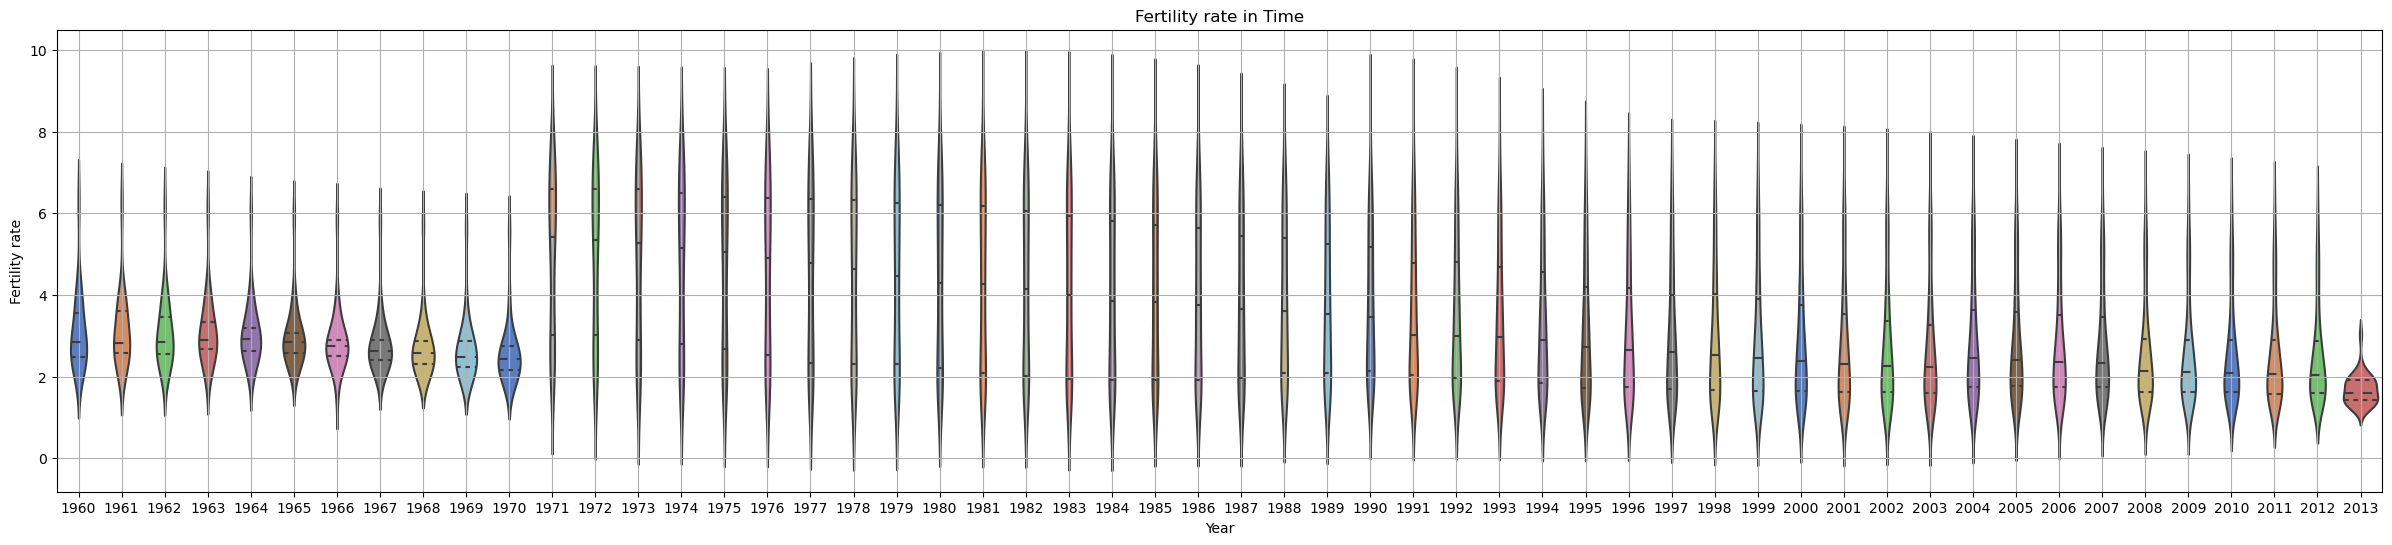

In [7]:
# Step 2.A - Decide on the time window to use:

# Create the violin plot for actual data only
plt.figure(figsize=(30, 6))
sns.violinplot(x='Year', y='Value_fertility', data=dataIn, inner="quart", palette="muted")
plt.xlabel('Year')
plt.ylabel('Fertility rate')
plt.title('Fertility rate in Time')
plt.grid(True)
plt.show()



It looks like after 1971 some countries got included into the equation. - Maybe something changed in the way data was collected. I'll be excluding data prior to 1972.

And something might have happened in 2013 as well, exclude that year, as I don't have 2 of those years for test and control groups.

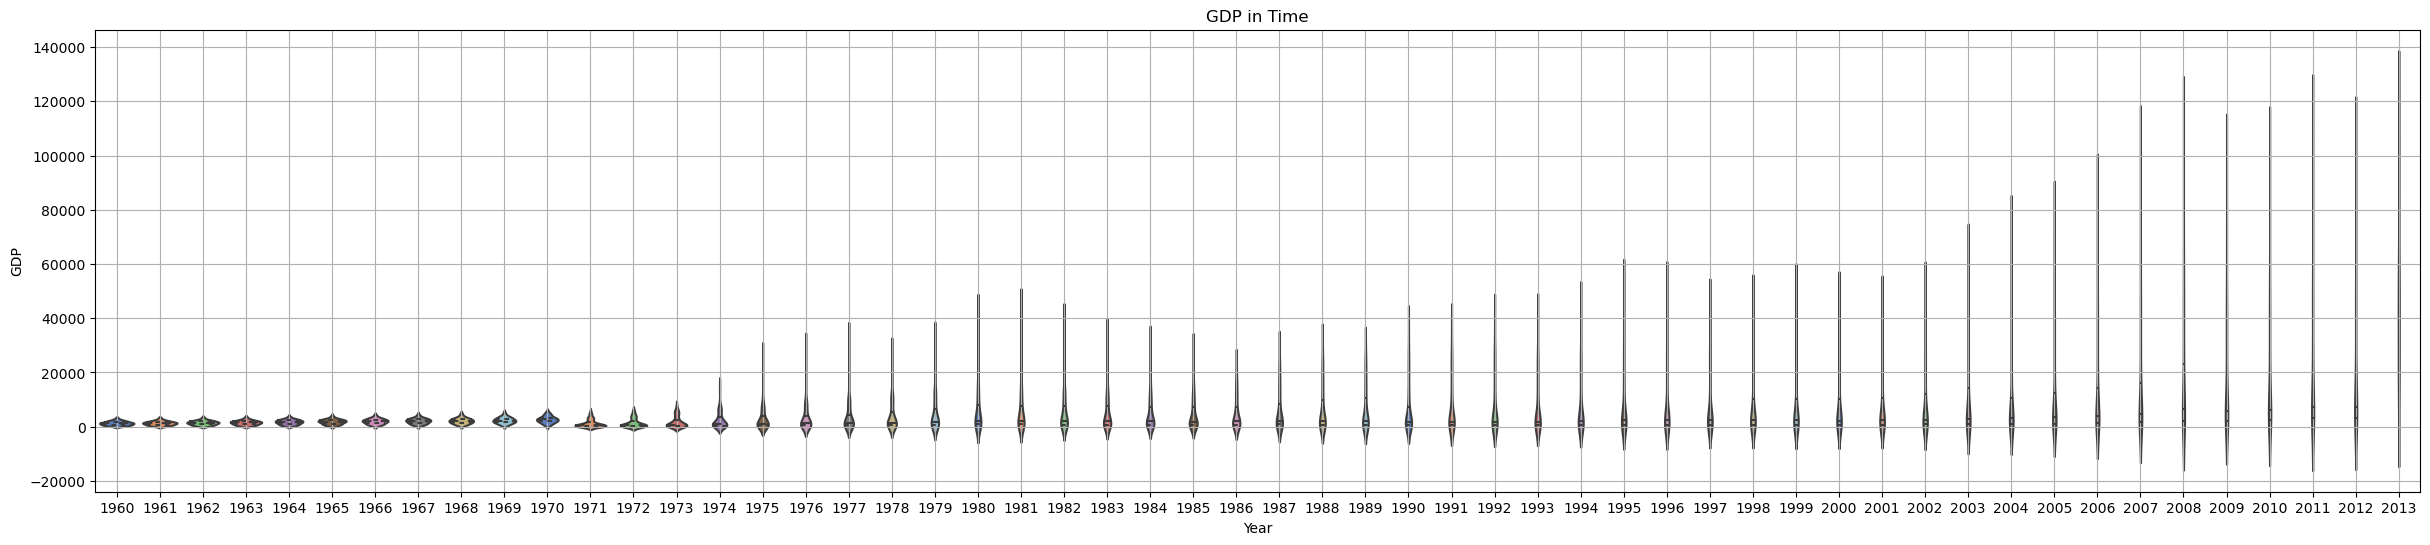

In [8]:
# Step 2.A.2 - GDP plot

# Create the violin plot for actual data only
plt.figure(figsize=(30, 6))
sns.violinplot(x='Year', y='Value_gdp', data=dataIn, inner="quart", palette="muted")
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP in Time')
plt.grid(True)
plt.show()

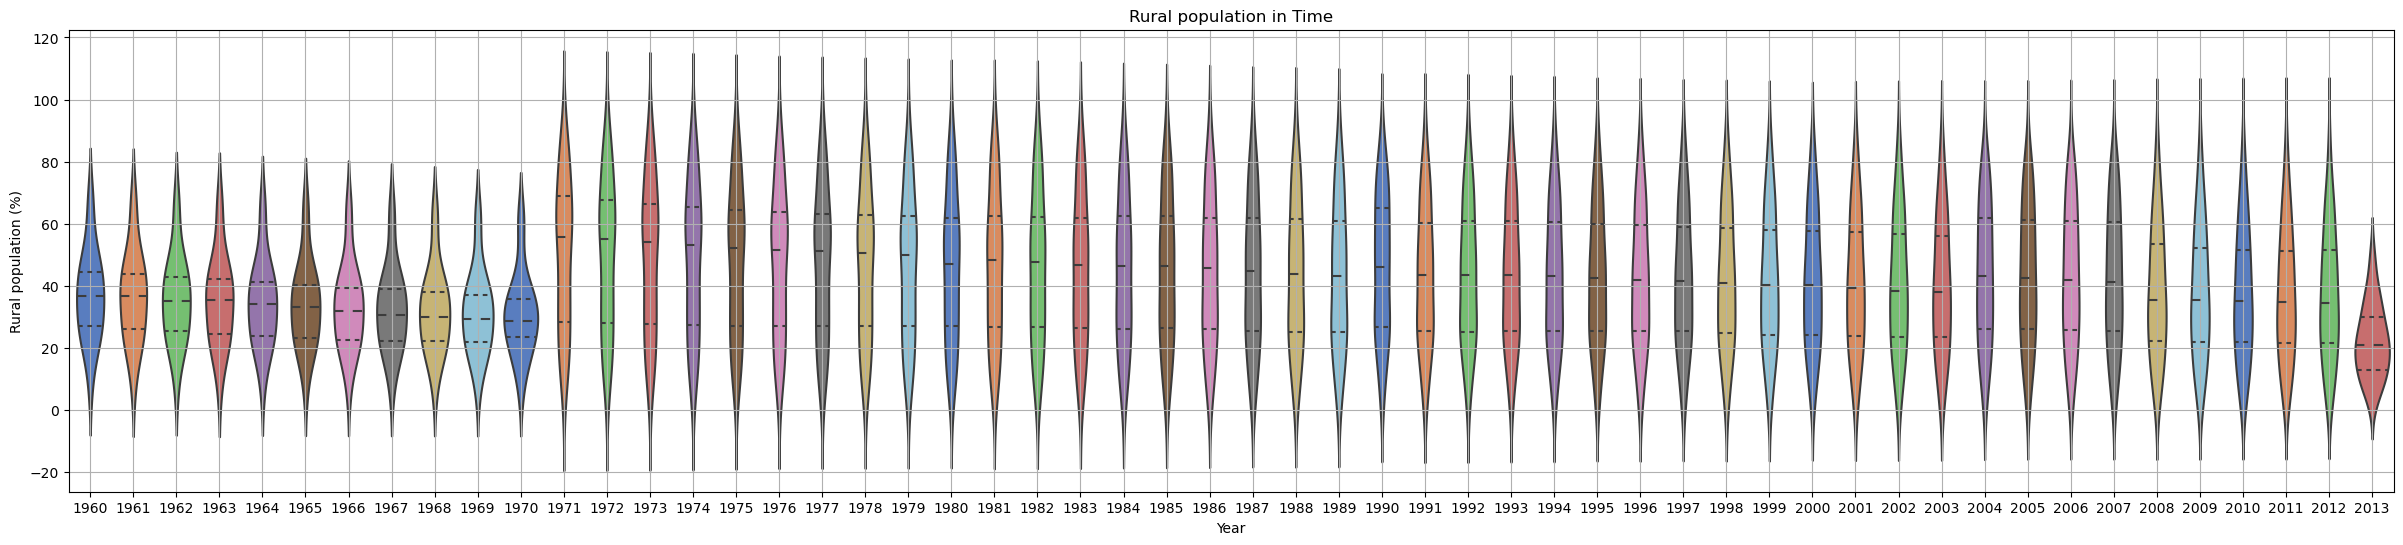

In [9]:
# Step 2.A.3 - Rural population (%)

# Create the violin plot for actual data only
plt.figure(figsize=(30, 6))
sns.violinplot(x='Year', y='Value_rural', data=dataIn, inner="quart", palette="muted")
plt.xlabel('Year')
plt.ylabel('Rural population (%)')
plt.title('Rural population in Time')
plt.grid(True)
plt.show()

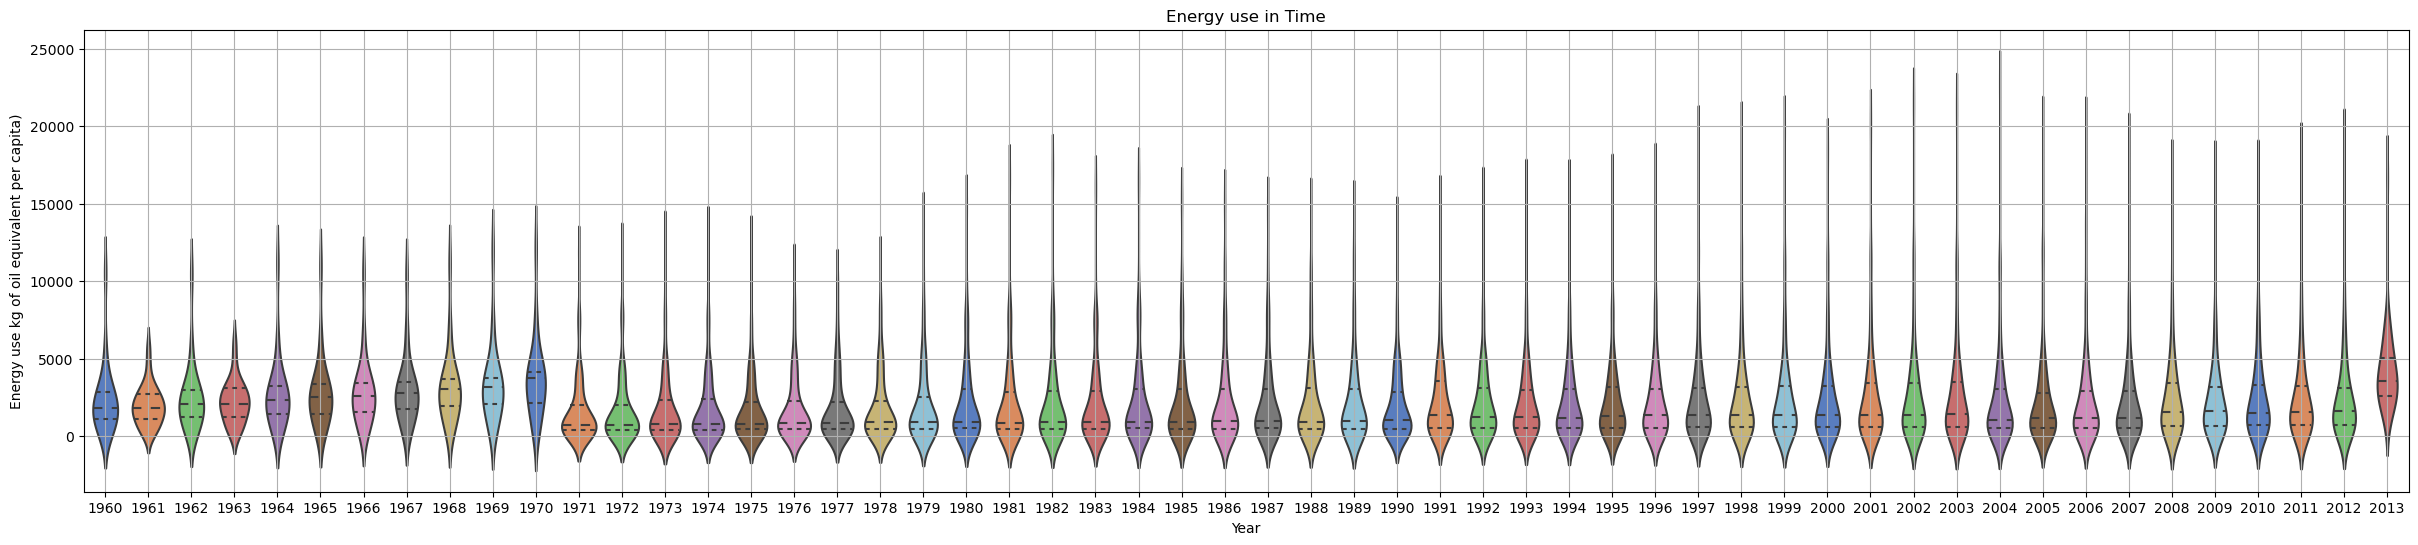

In [10]:
# Step 2.A.3 - Energy use (kg of oil equivalent per capita)

# Create the violin plot for actual data only
plt.figure(figsize=(30, 6))
sns.violinplot(x='Year', y='Value_energy', data=dataIn, inner="quart", palette="muted")
plt.xlabel('Year')
plt.ylabel('Energy use kg of oil equivalent per capita)')
plt.title('Energy use in Time')
plt.grid(True)
plt.show()

In [16]:
# Exclude here some data in time (prior to 1972 and after 2012).

dataForMod = dataIn[(dataIn['Year'] >=1971) & (dataIn['Year'] < 2013)]


# Data in format for correlation
dataForModRelevantColumns = dataForMod[['Value_fertility', 'Value_gdp', 'Value_rural', 'Value_energy']]

dataForModRelevantColumns

,Value_fertility,Value_gdp,Value_rural,Value_energy
250,7.624,339.384001,60.335,231.579899
251,3.104,1366.354558,20.679,1381.201367
252,2.961,3487.614924,14.400,3989.629744
253,2.200,2375.242674,34.699,2508.520919
254,6.942,131.770233,92.099,85.608044
...,...,...,...,...
5162,2.417,12771.595036,11.149,2558.278995
5163,1.768,1755.265424,68.332,730.571886
5164,4.416,1289.034078,67.126,278.241204
5165,5.511,1686.618024,60.413,613.995757


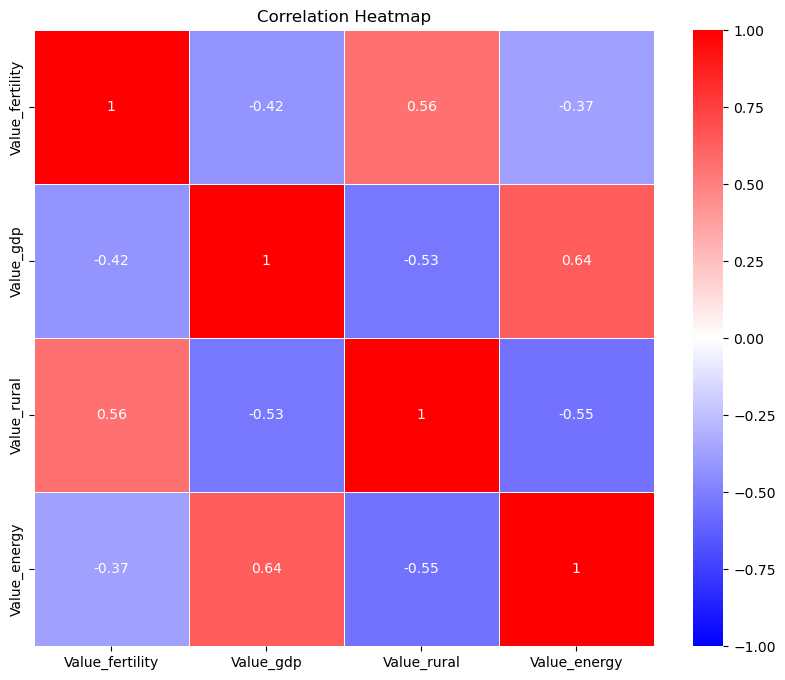

In [17]:
# Step 2.B - Check the correlation between inputs 
# Test the correlation with a heatmap visulization

# Assuming 'dataForMod' is your DataFrame with numeric columns
correlation_matrix = dataForModRelevantColumns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

# plt.savefig('correlation_heatmap.png', format='png')

plt.show()

In [18]:
# Use all odd years for the fit and all even years for the test:

auxData_fit = dataForMod[dataForMod['Year'] % 2 != 0] # The odd numbers
y_fit = auxData_fit['Value_fertility']
X_fit = auxData_fit[['Value_gdp', 'Value_rural', 'Value_energy', 'Year']]


auxData_test = dataForMod[dataForMod['Year'] % 2 == 0] # The even numbers
y_test = auxData_test['Value_fertility']
X_test = auxData_test[['Value_gdp', 'Value_rural', 'Value_energy', 'Year']]


# Do some regularization before inputing it into the model
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the feature matrix X
X_scaled = scaler.fit_transform(X_fit)

X_test_scaled = scaler.fit_transform(X_test)

# The model (fit)

model = LinearRegression()

model.fit(X_scaled, y_fit)

model


mse = mean_squared_error(y_fit, model.predict(X_scaled))

print("MODEL Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_fit, model.predict(X_scaled))
print("MODEL R-squared:", r2)

# Access the coefficients (weights) and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("MODEL Coefficients:", coefficients)
print("MODEL Intercept:", intercept)

# Test the model/prediction

predictions = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, model.predict(X_test_scaled))

# Calculate R-squared
r2 = r2_score(y_test, model.predict(X_test_scaled))
print()
print(f'TEST Mean Squared Error: {mse}')
print(f'TEST R-squared: {r2}')


MODEL Mean Squared Error: 1.921117013388771
MODEL R-squared: 0.44018062015407033
MODEL Coefficients: [-0.05937513  0.86388162 -0.1286512  -0.62485056]
MODEL Intercept: 3.4355254209445563

TEST Mean Squared Error: 1.9014708901324986
TEST R-squared: 0.43064159032573945


/tmp/ipykernel_56252/1302775296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_toplot.loc[:, 'Value_fertility_predicted'] = predictions


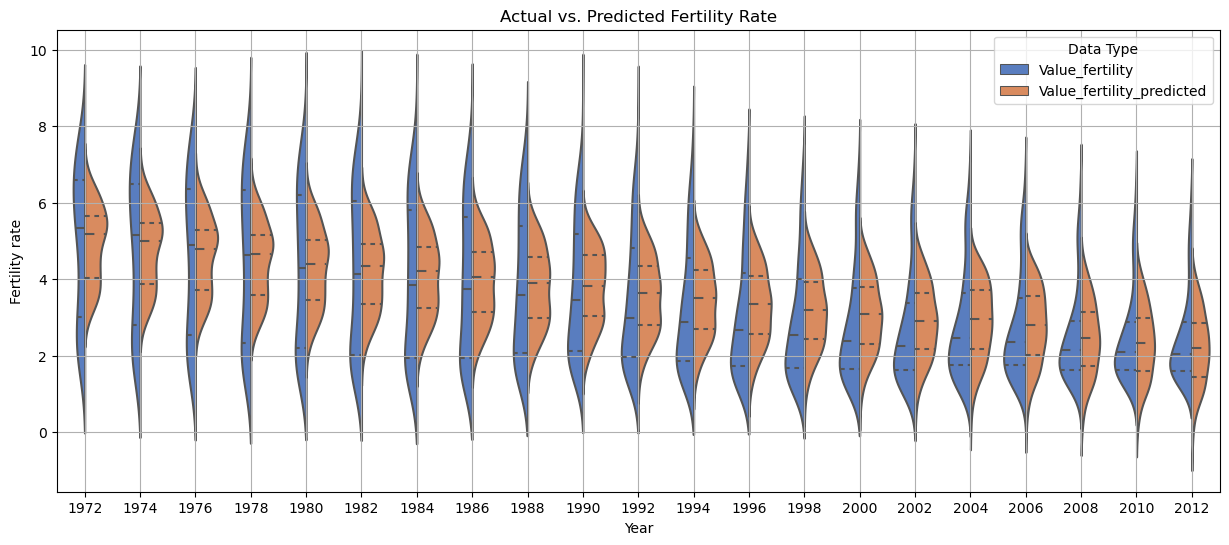

In [19]:
data_test_toplot = auxData_test[['Year', 'Value_fertility']]

data_test_toplot.loc[:, 'Value_fertility_predicted'] = predictions

df_melted = pd.melt(data_test_toplot, id_vars=['Year'], var_name='Data_Type', value_name='Value')

# Create the violin plot
plt.figure(figsize=(15, 6))
sns.violinplot(x='Year', y='Value', hue='Data_Type', data=df_melted, split=True, inner="quart", palette="muted")
plt.xlabel('Year')
plt.ylabel('Fertility rate')
plt.title('Actual vs. Predicted Fertility Rate')
plt.legend(title='Data Type')
plt.grid(True)

plt.savefig('violin_actual_predicted.png', format='png')

plt.show()



In [21]:
# pip install PrettyTable
# conda install -c conda-forge prettytable

from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Add columns to the table
table.field_names = ["Predictor", "Coefficient"]

# Add rows to the table
table.add_row(["GDP", f"{coefficients[0]:.3f}"])
table.add_row(["Rural Pop%", f" {coefficients[1]:.3f}"])
table.add_row(["Energy Use", f"{coefficients[2]:.3f}"])
table.add_row(["Time", f"{coefficients[3]:.3f}"])

# Print the table
print(table)


+------------+-------------+
| Predictor  | Coefficient |
+------------+-------------+
|    GDP     |    -0.059   |
| Rural Pop% |     0.864   |
| Energy Use |    -0.129   |
|    Time    |    -0.625   |
+------------+-------------+


Based on the fact that there are significant correlations between the different variables/columns, I want to try seeing if there are meaningful ways to cluster these data in time.

The plan will be to use dynamic time warping and try to do classification based on the similarities there. If it works, finally the goal will be to plot it on a map...

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

